### CNN Daily

In [3]:
import pandas as pd
import numpy as np
import os

In [5]:
CNNDaily_path = r"C:\Pro\Stages\A4 - DVRC\Work\Datasets\CNN-Daily"

In [12]:
os.path.join(CNNDaily_path, "test.bin")

'C:\\Pro\\Stages\\A4 - DVRC\\Work\\Datasets\\CNN-Daily\\test.bin'

In [ ]:
dt = np.dtype(('abstract', str), ('article', str))
cnn = np.fromfile(os.path.join(CNNDaily_path, "test.bin"), dtype=dt)
cnn = pd.DataFrame(cnn)
cnn.head(3)

### PubMed - HuggingFace

In [ ]:
from datasets import load_dataset
import pandas as pd

pubmed = load_dataset(r'C:\Pro\Stages\A4 - DVRC\Work\Datasets\Pubmed\pubmed.py', split="train")
pubmed = pd.DataFrame(pubmed)

In [ ]:
pubmed.head()

In [ ]:
pubmed.iloc[0, 0]

### PubMed - TensorFlow

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
pm_path = r"D:\COURS\A4\S8 - ESILV\Stage\Work\Datasets\Summary Evaluation\Pubmed\test.json"
pubmed_test = pd.read_json(pm_path, lines=True)
pm = pubmed_test[["article_text", "abstract_text"]]
cleaner = lambda x: ". ".join(x).replace("<S>", "").strip()

pm.loc[:,"abstract_text"] = pm["abstract_text"].replace(regex=r"\[[^\]]*\]", value="")
pm.loc[:,"article_text"] = pm["article_text"].replace(regex=r"\[[^\]]*\]", value="")
pm.loc[:,"abstract_text"] = pm["abstract_text"].map(cleaner)
pm.loc[:,"article_text"] = pm["article_text"].map(cleaner)
pm = pm.rename(columns={"abstract_text": "summary",
                        "article_text": "text"})
subset = pm.iloc[:500, :]

pm.head()

,text,summary
0,anxiety affects quality of life in those livin...,research on the implications of anxiety in par...
1,small non - coding rnas are transcribed into m...,"small non - coding rnas include sirna , mirna ..."
2,ohss is a serious complication of ovulation in...,objective : to evaluate the efficacy and safet...
3,congenital adrenal hyperplasia ( cah ) refers ...,congenital adrenal hyperplasia is a group of a...
4,type 1 diabetes ( t1d ) results from the destr...,objective(s):pentoxifylline is an immunomodula...


Text(0.5, 1.0, "Distribution of Length (first 500 pubmed's articles)")

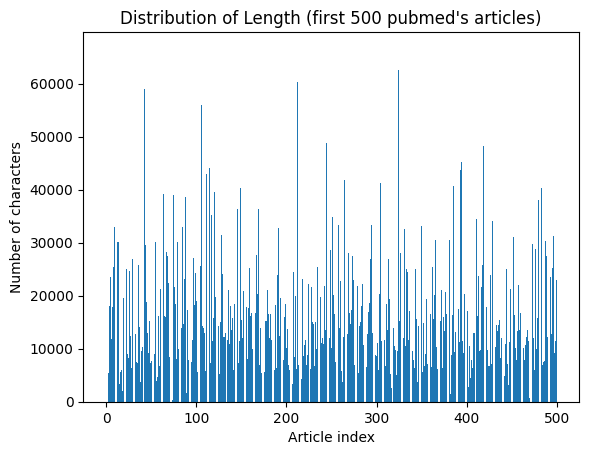

In [7]:
text_lens = [len(x) for x in subset.text.to_list()]
x = [x for x in range(500)]
plt.bar(x, text_lens)
plt.xlabel("Article index")
plt.ylabel("Number of characters")
plt.title("Distribution of Length (first 500 pubmed's articles)")

### Billsum

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
billsumTest_url='https://drive.google.com/file/d/1Wd0M3qepNF6B4YwFYrpo7CaSERpudAG_/view?usp=share_link'
billsumTest_url='https://drive.google.com/uc?id=' + billsumTest_url.split('/')[-2]
billsum_test = pd.read_json(billsumTest_url, lines=True)
billsum_test = billsum_test.loc[:, ["text", "summary"]]
subset = billsum_test.iloc[:500, :]

Text(0.5, 1.0, "Distribution of Length (first 500 billsum's articles)")

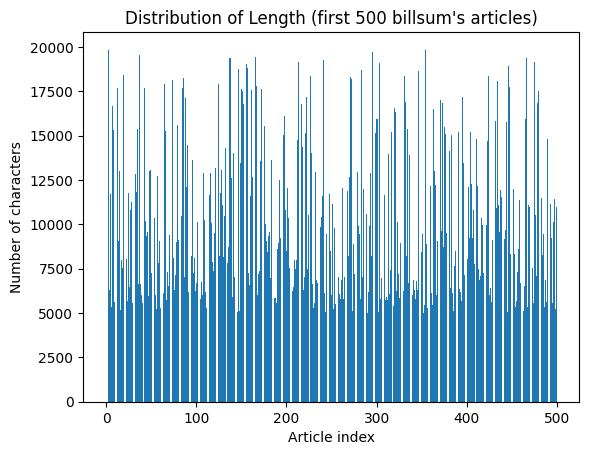

In [3]:
text_lens = [len(x) for x in subset.text.to_list()]
x = [x for x in range(500)]
plt.bar(x, text_lens)
plt.xlabel("Article index")
plt.ylabel("Number of characters")
plt.title("Distribution of Length (first 500 billsum's articles)")